**Predict Loan Eligibility for Dream Housing Finance company**


Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize'] = 15

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')
df_test = pd.read_csv('test_lAUu6dG.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Checkpoint

In [4]:
train = df.copy()
test = df_test.copy()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [8]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

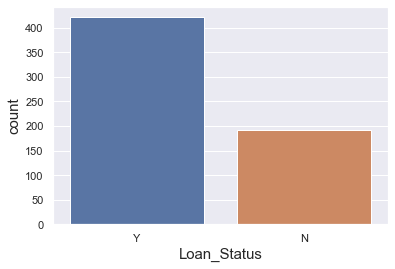

In [9]:
sns.countplot(x = 'Loan_Status', data = train);

In [10]:
print(f'Proportion of "N" loan status: {np.round((train.Loan_Status.value_counts(normalize = True)[1]),3)*100} %')
print(f'Proportion of "Y" loan status: {np.round((train.Loan_Status.value_counts(normalize = True)[0]),3)*100} %')

#Clearly unbalanced dataset

Proportion of "N" loan status: 31.3 %
Proportion of "Y" loan status: 68.7 %


In [11]:
train.loc[:, train.dtypes == 'object'].columns.values[1:-1]

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'], dtype=object)

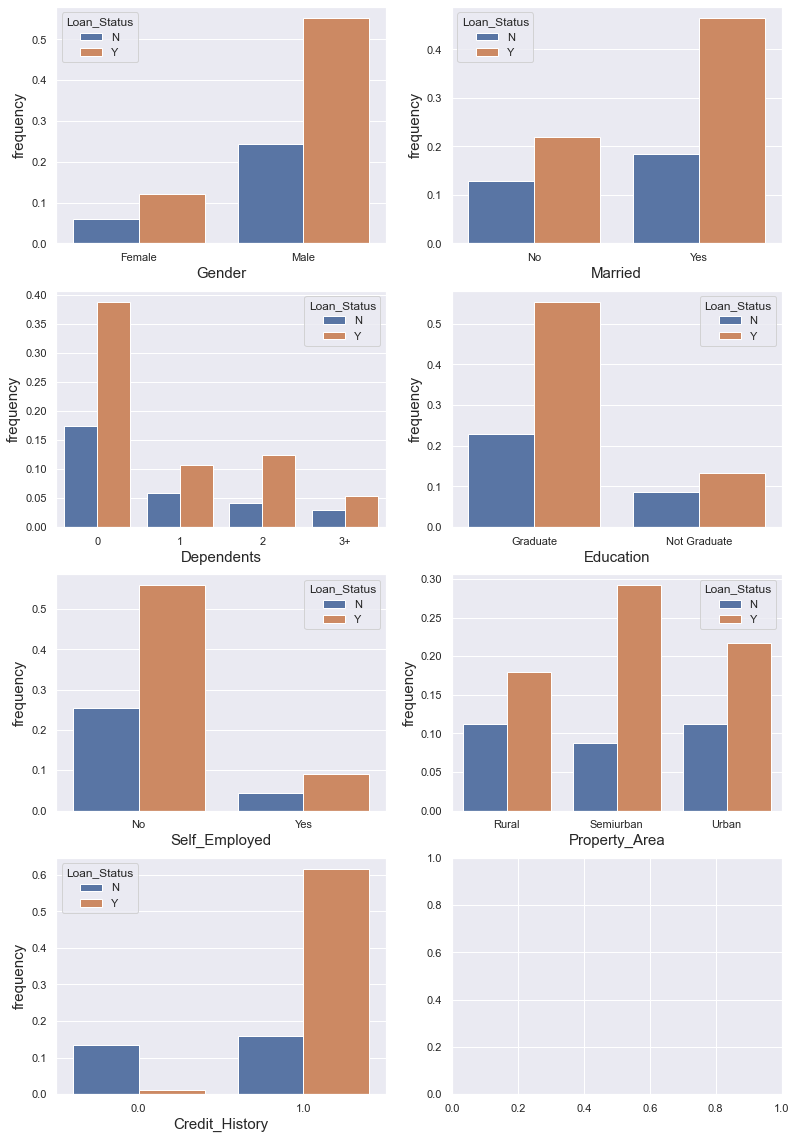

In [12]:
#Plotting for Categorical Variables

fig, axes = plt.subplots(4, 2, figsize=(13, 20))

total = len(train)
train['frequency'] = 0 # a dummy column to refer to
for col, ax in zip(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History'], axes.flatten()):
    counts = train.groupby([col, 'Loan_Status']).count()
    freq_per_group = counts.div(total).reset_index()
    sns.barplot(x=col, y='frequency', hue='Loan_Status', data=freq_per_group, ax=ax)

From the above plots, It is clear that: 

1) majority of the applicants are male. 

2) Majority of the pplicants are married.

3) Most of the applicants dont have dependents.

4) Most of the applicants have graduated from a university.

5) Majority of the applicants are not self-employed.

6) Applicants from semi-urban areas are comparitevely higher than urban and rural areas.

7) Majority of the applicants have repaid their debts. But those applicants who haven't repaid their debts has got their loan application rejected.

In [13]:
# Numerical Variables.
train.loc[:, train.dtypes != 'object'].columns.values[:-2]

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'], dtype=object)

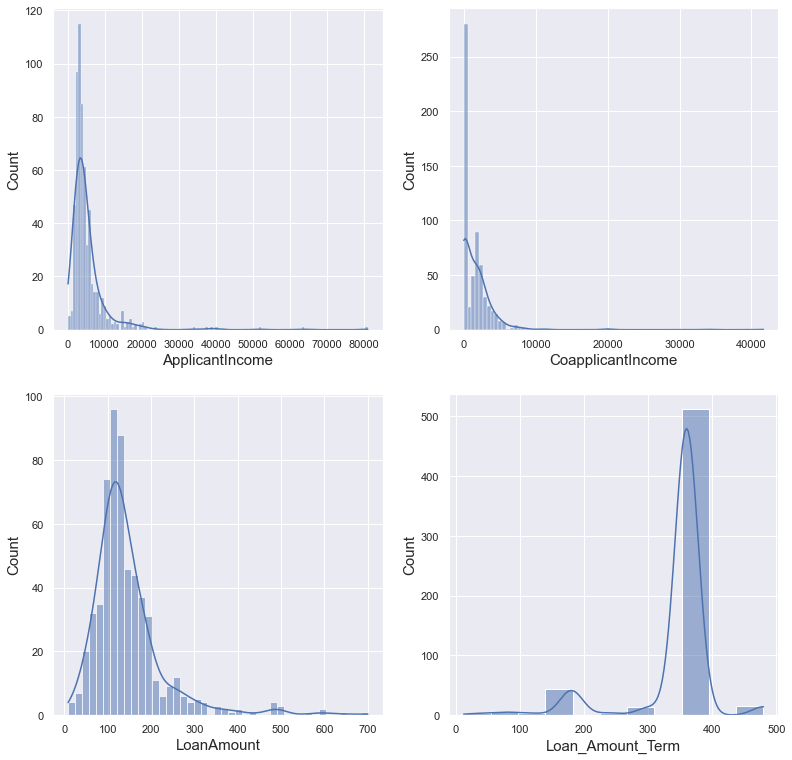

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13))

for col, ax in zip(train.loc[:, train.dtypes != 'object'].columns.values[:-2], axes.flatten()):
    sns.histplot(train[col], kde=True, ax = ax);

In [15]:
#Viewing the descriptive statistics of numerical variables.

train.loc[:, train.dtypes != 'object'].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,frequency
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.0
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.0
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.0
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.0
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.0
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,0.0
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,0.0
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,0.0


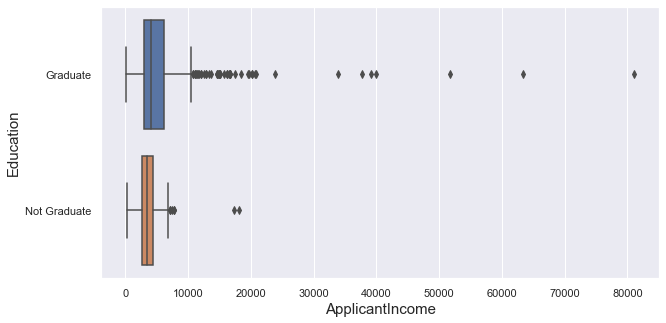

In [16]:
#Lets check the income levels based on education
plt.figure(figsize = (10,5))
sns.boxplot(x = 'ApplicantIncome', y = 'Education', data = train);

#Graduated applicants have a wider range of income levels compared to not graduated applicants. The median
#salary of a graduate is higher than that of non-graduate.

Lets check some of the numerical variables against loan Status

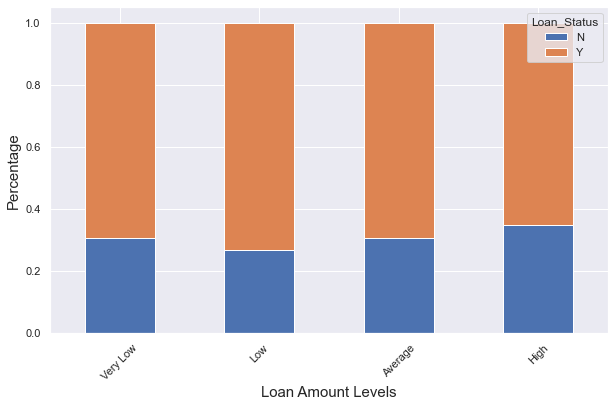

In [17]:
#Loan amounts

bins = [0,100, 130, 170, 700] #Keeping same bins as main applicants incomes
groups = ['Very Low', 'Low', 'Average', 'High']
train['Loan_amt_bin'] = pd.cut(x = train['LoanAmount'], bins = bins, labels = groups)

Loan_amt_bin = pd.crosstab(index = train.Loan_amt_bin, columns = train['Loan_Status'])
Loan_amt_bin.div(Loan_amt_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Loan Amount Levels")
plt.ylabel('Percentage')
plt.xticks(rotation=45) ;

#Although most of the loam amount levels have almost equal proportions of approved and not approved status,
# higher loan amounts tend to have higher chances of loans not getting approved.

In [18]:
#In terms of applicant income.

#Binning

bins = [0,2800, 3800, 5800, 81000]
groups = ['Low', 'Middle', 'Upper-Middle', 'High']
train['Income_bin'] = pd.cut(x = train['ApplicantIncome'], bins = bins, labels = groups)

Income_bin = pd.crosstab(index = train.Income_bin, columns = train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,47,102
Middle,49,108
Upper-Middle,47,108
High,49,104


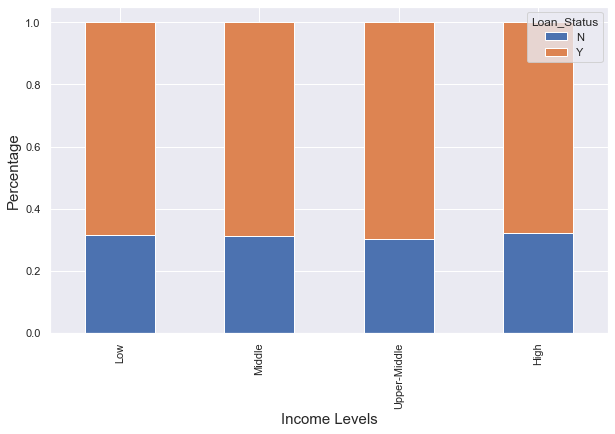

In [19]:
Income_bin.div(Income_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel('Income Levels')
plt.ylabel('Percentage');

#It's clear that income levels does not affect the chances of loan being approved or not.

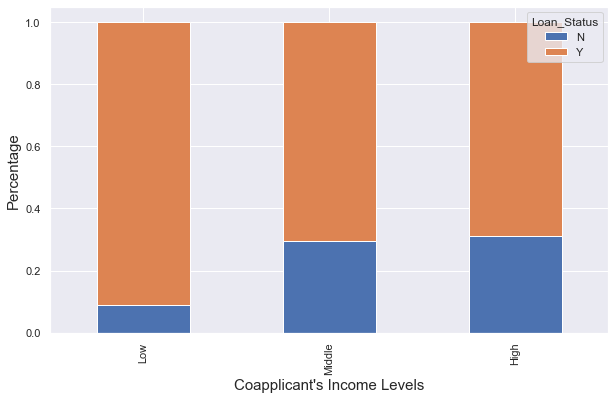

In [20]:
#Checking for co-applicant income

bins = [0,1200, 2300, 42000]
groups = ['Low', 'Middle', 'High']
train['Co_app_Income_bin'] = pd.cut(x = train['CoapplicantIncome'], bins = bins, labels = groups)

Coapp_Income_bin = pd.crosstab(index = train.Co_app_Income_bin, columns = train['Loan_Status'])
Coapp_Income_bin.div(Coapp_Income_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Coapplicant's Income Levels")
plt.ylabel('Percentage');

#Here we can clearly see that if the coapplicant salary is low, there is a higher chance the loan will
#get approved.

### Feature Engineering & Data Preprocessing

Let's create some extra features from the variables. But first, we have to impute the train data set in order to ensure no missing wales exist.

##### Handling Missing Values

In [21]:
train.isnull().sum()

#Gender, MArried, dependents, self_employed and loan amount, loan amount term and credit history 
#have missing values.

#Out of these, Gender, Married, dependents, self_employed and credit history are categorical variables.

#HEnce we will replace missing value of categorical vriables with their mode.

#Varibales with bins will be removed later. Hence, no imputation is done.

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
frequency              0
Loan_amt_bin          22
Income_bin             0
Co_app_Income_bin    273
dtype: int64

In [22]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
train.Loan_Amount_Term.value_counts()

#For loan amount terms, we can see 360 is the most repeating term compared to others.

#We can replace this with its mode too.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
import time

t0 = time.time() #To measure how long it takes for this algorithm to run

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [25]:
train.loc[:,['Gender', 'Married', 'Dependents', 
             'Self_Employed', 'Credit_History', 
             'Loan_Amount_Term']] = imputer.fit_transform(train.loc[:,['Gender', 'Married','Dependents',
                                                                       'Self_Employed','Credit_History',
                                                                       'Loan_Amount_Term']])
#Doing the same for test dataset

test.loc[:,['Gender', 'Married', 'Dependents','Self_Employed', 'Credit_History', 
             'Loan_Amount_Term']] = imputer.transform(test.loc[:,['Gender', 'Married', 'Dependents',
                                                                  'Self_Employed', 'Credit_History',
                                                                  'Loan_Amount_Term']])

print('Simple Imputer (Most Frequent) Time Elapsed:', time.time()-t0)

Simple Imputer (Most Frequent) Time Elapsed: 0.2041645050048828


In [26]:
train.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
frequency              0
Loan_amt_bin          22
Income_bin             0
Co_app_Income_bin    273
dtype: int64

In [27]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

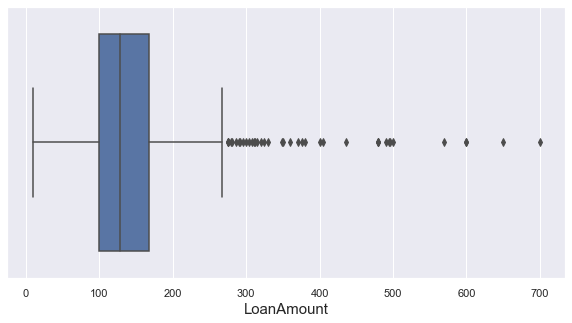

In [28]:
#Loan Amount: Since the distribution of Loan amount is right skewed, its missing values will be imputed 
#with its median

plt.figure(figsize = (10,5))
sns.boxplot(x = 'LoanAmount', data = train);

In [29]:
imputer = SimpleImputer(strategy='median')

train[['LoanAmount']] = imputer.fit_transform(train[['LoanAmount']])
test[['LoanAmount']] = imputer.transform(test[['LoanAmount']])

In [30]:
train.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
frequency              0
Loan_amt_bin          22
Income_bin             0
Co_app_Income_bin    273
dtype: int64

In [31]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_income, dtype: float64


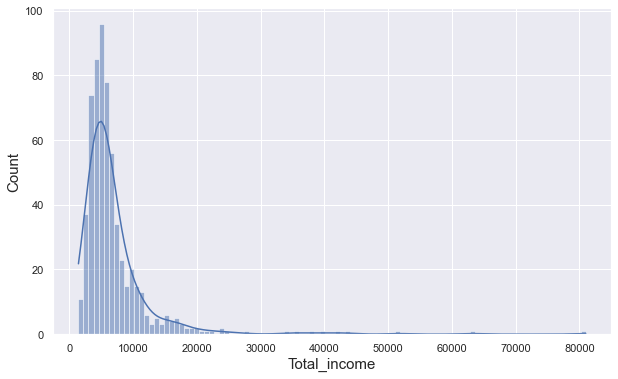

In [32]:
#Now, lets check whether combining both applicant and co-applicant incomes have an impact on loan getting
#approved or now.

train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

#Same for test set
test['Total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

print(train['Total_income'].describe())
plt.figure(figsize = (10,6))
sns.histplot(train['Total_income'],kde = True);

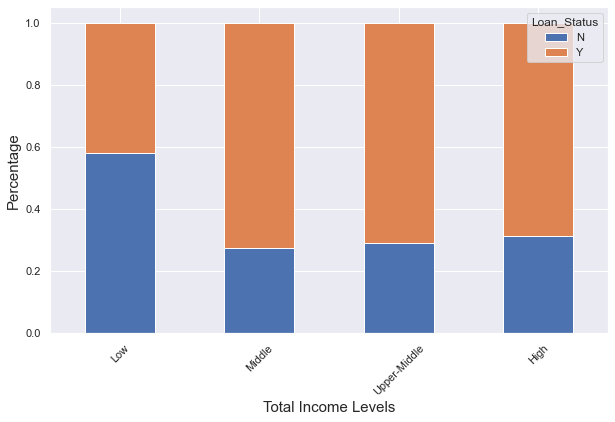

In [33]:
#Binning total income

bins = [0,2800, 3800, 5800, 81000] #Keeping same bins as main applicants incomes
groups = ['Low', 'Middle', 'Upper-Middle', 'High']
train['Total_Income_bin'] = pd.cut(x = train['Total_income'], bins = bins, labels = groups)

Total_income_bin = pd.crosstab(index = train.Total_Income_bin, columns = train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Total Income Levels")
plt.ylabel('Percentage')
plt.xticks(rotation=45);

#Here, applicants within the low total income range are more likely to get their loans not approved.

count     614.000000
mean      473.687083
std       511.134356
min        25.000000
25%       288.888889
50%       361.111111
75%       505.555556
max      9250.000000
Name: EMI, dtype: float64


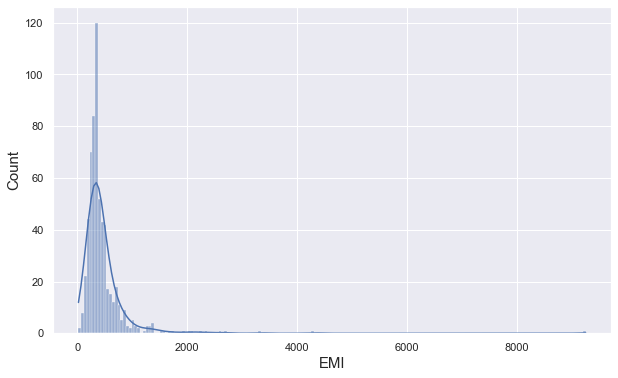

In [34]:
#Creating EMI variable.

#EMI is the loan amount applicant has to pay per month.

train['EMI'] = (train['LoanAmount']*1000)/train['Loan_Amount_Term']

#Same for test set
test['EMI'] = (test['LoanAmount']*1000)/test['Loan_Amount_Term']

print(train['EMI'].describe())
plt.figure(figsize = (10,6))
sns.histplot(train['EMI'],kde = True);

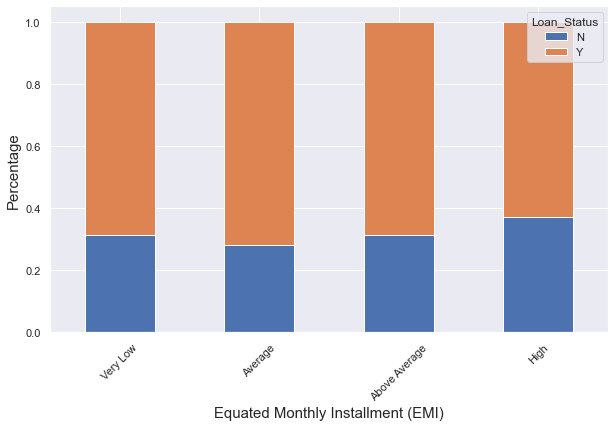

In [35]:
#Checking for EMI's effect on loan status

bins = [0,300, 400, 600, 9250] #Keeping same bins as main applicants incomes
groups = ['Very Low', 'Average', 'Above Average', 'High']
train['EMI_bin'] = pd.cut(x = train['EMI'], bins = bins, labels = groups)

EMI_bin = pd.crosstab(index = train.EMI_bin, columns = train['Loan_Status'])
EMI_bin.div(EMI_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Equated Monthly Installment (EMI)")
plt.ylabel('Percentage')
plt.xticks(rotation=45);

#No significant effect is found on the loan Status

count      614.000000
mean      6551.017998
std       6290.136695
min      -1768.000000
25%       3804.305556
50%       4979.888889
75%       6958.027778
max      80000.000000
Name: Balance_income, dtype: float64


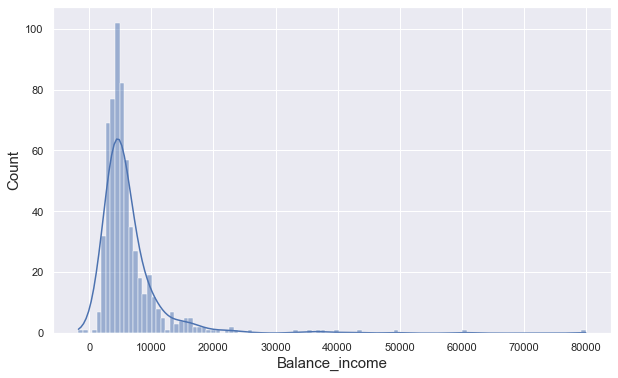

In [36]:
#Creating Balance Income variable.

#Balance Income is the remaning amount left after applicant pays EMI.

train['Balance_income'] = train['Total_income'] - train['EMI']

#Same for test set
test['Balance_income'] = test['Total_income'] - test['EMI']

print(train['Balance_income'].describe())
plt.figure(figsize = (10,6))
sns.histplot(train['Balance_income'],kde = True);

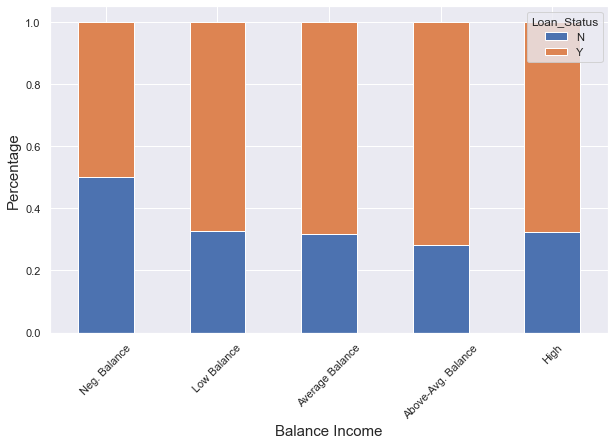

In [37]:
#Checking for EMI's effect on loan status

bins = [-2000,0,4000, 5000, 7000, 80000] #Keeping same bins as main applicants incomes
groups = ['Neg. Balance', 'Low Balance', 'Average Balance', 'Above-Avg. Balance', 'High']
train['Balance_income_bin'] = pd.cut(x = train['Balance_income'], bins = bins, labels = groups)

Balance_income_bin = pd.crosstab(index = train.Balance_income_bin, columns = train['Loan_Status'])
Balance_income_bin.div(Balance_income_bin.sum(1), axis = 0).plot(kind = 'bar', 
                                                                 stacked = True, figsize = (10,6))
plt.xlabel("Balance Income")
plt.ylabel('Percentage')
plt.xticks(rotation=45);

#Applicants with the potential to have negative balance after paying EMI are more liekly to get their 
#loan applications rejected.

##### Correlation plot

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Loan_ID             614 non-null    object  
 1   Gender              614 non-null    object  
 2   Married             614 non-null    object  
 3   Dependents          614 non-null    object  
 4   Education           614 non-null    object  
 5   Self_Employed       614 non-null    object  
 6   ApplicantIncome     614 non-null    int64   
 7   CoapplicantIncome   614 non-null    float64 
 8   LoanAmount          614 non-null    float64 
 9   Loan_Amount_Term    614 non-null    float64 
 10  Credit_History      614 non-null    float64 
 11  Property_Area       614 non-null    object  
 12  Loan_Status         614 non-null    object  
 13  frequency           614 non-null    int64   
 14  Loan_amt_bin        592 non-null    category
 15  Income_bin          614 non-null    cate

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Total_income       367 non-null    int64  
 13  EMI                367 non-null    float64
 14  Balance_income     367 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 43.1+ KB


In [40]:
#Removing unecessary variables

train.drop(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                 'Loan_Amount_Term', 'frequency', 'Loan_amt_bin', 
                 'Income_bin', 'Co_app_Income_bin', 'Total_Income_bin', 
                 'EMI_bin', 'Balance_income_bin']], axis = 1, inplace = True)

#Dropping varibales from testset
test.drop(test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount',
                'Loan_Amount_Term']], axis = 1, inplace = True)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         614 non-null    object 
 1   Gender          614 non-null    object 
 2   Married         614 non-null    object 
 3   Dependents      614 non-null    object 
 4   Education       614 non-null    object 
 5   Self_Employed   614 non-null    object 
 6   Credit_History  614 non-null    float64
 7   Property_Area   614 non-null    object 
 8   Loan_Status     614 non-null    object 
 9   Total_income    614 non-null    float64
 10  EMI             614 non-null    float64
 11  Balance_income  614 non-null    float64
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         367 non-null    object 
 1   Gender          367 non-null    object 
 2   Married         367 non-null    object 
 3   Dependents      367 non-null    object 
 4   Education       367 non-null    object 
 5   Self_Employed   367 non-null    object 
 6   Credit_History  367 non-null    float64
 7   Property_Area   367 non-null    object 
 8   Total_income    367 non-null    int64  
 9   EMI             367 non-null    float64
 10  Balance_income  367 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 31.7+ KB


In [43]:
#Converting loan status to 1 and 0

train['Loan_Status'] = np.where(train['Loan_Status'] == 'N',0,1).astype('int64')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         614 non-null    object 
 1   Gender          614 non-null    object 
 2   Married         614 non-null    object 
 3   Dependents      614 non-null    object 
 4   Education       614 non-null    object 
 5   Self_Employed   614 non-null    object 
 6   Credit_History  614 non-null    float64
 7   Property_Area   614 non-null    object 
 8   Loan_Status     614 non-null    int64  
 9   Total_income    614 non-null    float64
 10  EMI             614 non-null    float64
 11  Balance_income  614 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [45]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [46]:
#Here, I will map Dependents to 1 representing yes and 0, representing no.

train['Dependents'] = np.where(train['Dependents'] != '0', 1,0)
test['Dependents'] = np.where(test['Dependents'] != '0', 1,0)

In [47]:
train.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
Total_income      0
EMI               0
Balance_income    0
dtype: int64

In [48]:
test.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Total_income      0
EMI               0
Balance_income    0
dtype: int64

In [49]:
train.corr()

,Dependents,Credit_History,Loan_Status,Total_income,EMI,Balance_income
Dependents,1.000000,-0.020500,0.003044,0.091343,0.101121,0.085574
Credit_History,-0.020500,1.000000,0.540556,-0.012563,0.015206,-0.014135
Loan_Status,0.003044,0.540556,1.000000,-0.031271,-0.011757,-0.031153
Total_income,0.091343,-0.012563,-0.031271,1.000000,0.364980,0.997134
EMI,0.101121,0.015206,-0.011757,0.364980,1.000000,0.293499
Balance_income,0.085574,-0.014135,-0.031153,0.997134,0.293499,1.000000


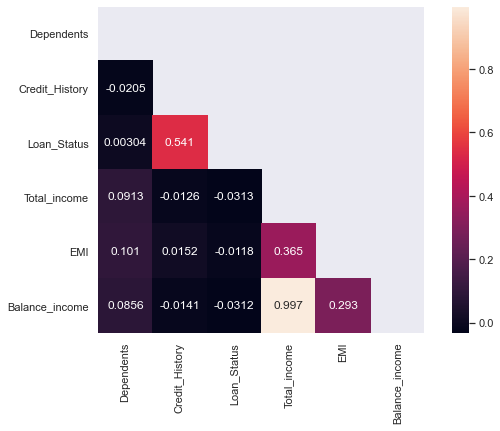

In [50]:
plt.figure(figsize = (10,6))
sns.heatmap(train.corr(), annot = True, fmt='.3g', square  = True, mask = np.triu(train.corr()));

#The only noticable correlations are between: 

#1) Credit history and Loan Status
#2) Total income and EMI
#3) EMI and balance income
#4) Total Income and Balance Income

##### Outliers

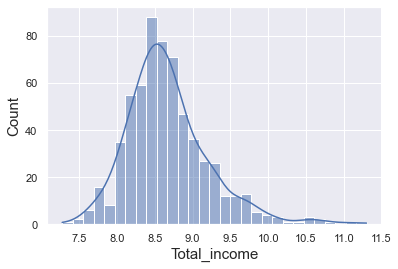

In [51]:
# Taking the log transformation of the total income will transform it to nealy normal distribution

sns.histplot(np.log(train.Total_income), kde = True);

In [52]:
train['Total_Income_log'] = np.log(train.Total_income)

#for testset
test['Total_Income_log'] = np.log(test.Total_income)

In [53]:
train.Total_Income_log.describe() #Mean and median are nearly equal

count    614.000000
mean       8.669414
std        0.545102
min        7.273786
25%        8.334712
50%        8.597205
75%        8.925549
max       11.302204
Name: Total_Income_log, dtype: float64

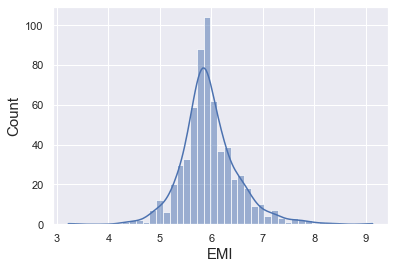

In [54]:
#Similarly for EMI
sns.histplot(np.log(train.EMI), kde = True);

In [55]:
train['EMI_log'] = np.log(train.EMI)

#For testset
test['EMI_log'] = np.log(test.EMI)

train.EMI_log.describe()

count    614.000000
mean       5.961771
std        0.563833
min        3.218876
25%        5.666042
50%        5.889186
75%        6.225658
max        9.132379
Name: EMI_log, dtype: float64

C:\Users\joean\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


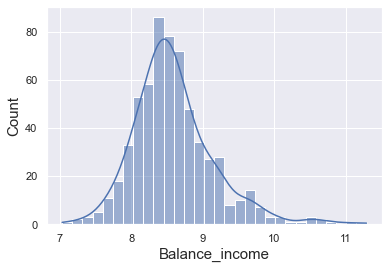

In [56]:
#Similarly for Balance Income
sns.histplot(np.log(train.Balance_income), kde = True);

In [57]:
train['Balance_income_log'] = np.log(train.Balance_income)

#For testset
test['Balance_income_log'] = np.log(test.Balance_income)

train.Balance_income_log.describe()

C:\Users\joean\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    612.000000
mean       8.591961
std        0.562197
min        7.035073
25%        8.244830
50%        8.516048
75%        8.851149
max       11.289782
Name: Balance_income_log, dtype: float64

In [58]:
#There are NaN in Log of Balance incomes

print(train['Balance_income_log'].isna().sum())
print(test['Balance_income_log'].isna().sum())

2
2


In [59]:
train['Balance_income_log'] = train['Balance_income_log'].fillna(train['Balance_income_log'].mean())
test['Balance_income_log'] = test['Balance_income_log'].fillna(test['Balance_income_log'].mean())
print(train['Balance_income_log'].isna().sum())
print(test['Balance_income_log'].isna().sum())

0
0


In [60]:
#Dropping variables

train.drop(train[['Total_income', 'EMI', 'Balance_income']], axis = 1, inplace = True)
test.drop(test[['Total_income', 'EMI', 'Balance_income']], axis = 1, inplace = True)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int32  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Credit_History      614 non-null    float64
 7   Property_Area       614 non-null    object 
 8   Loan_Status         614 non-null    int64  
 9   Total_Income_log    614 non-null    float64
 10  EMI_log             614 non-null    float64
 11  Balance_income_log  614 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             367 non-null    object 
 1   Gender              367 non-null    object 
 2   Married             367 non-null    object 
 3   Dependents          367 non-null    int32  
 4   Education           367 non-null    object 
 5   Self_Employed       367 non-null    object 
 6   Credit_History      367 non-null    float64
 7   Property_Area       367 non-null    object 
 8   Total_Income_log    367 non-null    float64
 9   EMI_log             367 non-null    float64
 10  Balance_income_log  367 non-null    float64
dtypes: float64(4), int32(1), object(6)
memory usage: 30.2+ KB


### Model Building

In [63]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI_log,Balance_income_log
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,8.674026,5.873682,8.611311
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,8.714568,5.873682,8.654421
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,8.006368,5.211306,7.943309
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,8.505323,5.809143,8.435477
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,8.699515,5.970411,8.632009


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int32  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Credit_History      614 non-null    float64
 7   Property_Area       614 non-null    object 
 8   Loan_Status         614 non-null    int64  
 9   Total_Income_log    614 non-null    float64
 10  EMI_log             614 non-null    float64
 11  Balance_income_log  614 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [65]:
X = train.drop(train[['Loan_ID', 'Loan_Status']], axis = 1).values
y = train.Loan_Status.values

In [66]:
np.set_printoptions(threshold=np.inf)

print(X)
print()
print(y)

[['Male' 'No' 0 'Graduate' 'No' 1.0 'Urban' 8.674025985443025
  5.873681511451599 8.611310741128015]
 ['Male' 'Yes' 1 'Graduate' 'No' 1.0 'Rural' 8.714567550836485
  5.873681511451599 8.654420523412435]
 ['Male' 'Yes' 0 'Graduate' 'Yes' 1.0 'Urban' 8.006367567650246
  5.211305989558407 7.94330943168311]
 ['Male' 'Yes' 0 'Not Graduate' 'No' 1.0 'Urban' 8.50532301884575
  5.809142990314028 8.435476861796248]
 ['Male' 'No' 0 'Graduate' 'No' 1.0 'Urban' 8.699514748210191
  5.970411137910149 8.632008865844819]
 ['Male' 'Yes' 1 'Graduate' 'Yes' 1.0 'Urban' 9.170871628065816
  6.608899905932231 9.090580383435578]
 ['Male' 'Yes' 0 'Not Graduate' 'No' 1.0 'Urban' 8.255568653283746
  5.575528139132523 8.18454474588987]
 ['Male' 'Yes' 1 'Graduate' 'No' 0.0 'Semiurban' 8.61974977974133
  6.084246280558948 8.537213659907048]
 ['Male' 'Yes' 1 'Graduate' 'No' 1.0 'Urban' 8.61830469278465
  6.145615226935241 8.530175225639406]
 ['Male' 'Yes' 1 'Graduate' 'No' 1.0 'Semiurban' 10.077818939438902
  6.876

In [67]:
X[:,[0,1,3,4]]

array([['Male', 'No', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'Yes'],
       ['Male', 'Yes', 'Not Graduate', 'No'],
       ['Male', 'No', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'Yes'],
       ['Male', 'Yes', 'Not Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'No', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'No', 'Graduate', 'No'],
       ['Male', 'No', 'Not Graduate', 'No'],
       ['Female', 'No', 'Graduate', 'No'],
       ['Male', 'Yes', 'Not Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Not Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Not Graduate', 'No'],
       ['Mal

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [69]:
#Encoding Binary variables
le = LabelEncoder()

for i in [0,1,3,4]: 
    X[:,i] = le.fit_transform(X[:,i])
    
print(X[:,[0,1,3,4]])

[[1 0 0 0]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 0 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 0 0]
 [1 1 1 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 0 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [0 1 0 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [1 1 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [1 0 0 0]
 [1 1 1 0]
 [1 1 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 1 0 1]
 [1 1 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [1 1 0 1]
 [0 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]

In [70]:
X[:,6]

array(['Urban', 'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban',
       'Semiurban', 'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban',
       'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Rural', 'Semiurban', 'Semiurban',
       'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Urban',
       'Rural', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Urban',
       'Semiurban', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Urban',
       'Urban', 'Rural', 'Rural', 'Semiurban', 'Semiurban', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', '

In [71]:
#Onehotencoding property area
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = ct.fit_transform(X)

print(X)

[[0.0 0.0 1.0 1 0 0 0 0 1.0 8.674025985443025 5.873681511451599
  8.611310741128015]
 [1.0 0.0 0.0 1 1 1 0 0 1.0 8.714567550836485 5.873681511451599
  8.654420523412435]
 [0.0 0.0 1.0 1 1 0 0 1 1.0 8.006367567650246 5.211305989558407
  7.94330943168311]
 [0.0 0.0 1.0 1 1 0 1 0 1.0 8.50532301884575 5.809142990314028
  8.435476861796248]
 [0.0 0.0 1.0 1 0 0 0 0 1.0 8.699514748210191 5.970411137910149
  8.632008865844819]
 [0.0 0.0 1.0 1 1 1 0 1 1.0 9.170871628065816 6.608899905932231
  9.090580383435578]
 [0.0 0.0 1.0 1 1 0 1 0 1.0 8.255568653283746 5.575528139132523
  8.18454474588987]
 [0.0 1.0 0.0 1 1 1 0 0 0.0 8.61974977974133 6.084246280558948
  8.537213659907048]
 [0.0 0.0 1.0 1 1 1 0 0 1.0 8.61830469278465 6.145615226935241
  8.530175225639406]
 [0.0 1.0 0.0 1 1 1 0 0 1.0 10.077818939438902 6.876723169734409
  10.036249204541894]
 [0.0 0.0 1.0 1 1 1 0 0 1.0 8.268731832117737 5.27014648958134
  8.21758847400755]
 [0.0 0.0 1.0 1 1 1 0 0 1.0 8.375629627094451 5.712999129761125
  8.30

In [72]:
#Checkpoint for unscaled trainset for ensemble classification

X_unscaled = X

In [73]:
X[:,[9,10,11]]

array([[8.674025985443025, 5.873681511451599, 8.611310741128015],
       [8.714567550836485, 5.873681511451599, 8.654420523412435],
       [8.006367567650246, 5.211305989558407, 7.94330943168311],
       [8.50532301884575, 5.809142990314028, 8.435476861796248],
       [8.699514748210191, 5.970411137910149, 8.632008865844819],
       [9.170871628065816, 6.608899905932231, 9.090580383435578],
       [8.255568653283746, 5.575528139132523, 8.18454474588987],
       [8.61974977974133, 6.084246280558948, 8.537213659907048],
       [8.61830469278465, 6.145615226935241, 8.530175225639406],
       [10.077818939438902, 6.876723169734409, 10.036249204541894],
       [8.268731832117737, 5.27014648958134, 8.21758847400755],
       [8.375629627094451, 5.712999129761125, 8.303312165714518],
       [9.321792297270326, 6.319968614080018, 9.270818577845567],
       [8.453827315794417, 5.757849695926477, 8.383966514266001],
       [7.776954403322442, 4.953476880256307, 7.715718133970664],
       [8.50714

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,[9,10,11]] = sc.fit_transform(X[:,[9,10,11]])

In [75]:
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB

#model_names = ('Logistic', 'Linear_SVC', 'Kernal_SVC', 'KNN', 'Naive_Bayes')

from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(random_state = 0),
    SVC(kernel = 'linear', random_state = 0),
    SVC(kernel = 'rbf', random_state = 0),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    GaussianNB(),
]

mean_acc = []
acc_std = []

for model in models:
    accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    mean_acc.append(accuracy.mean()*100)
    acc_std.append(accuracy.std()*100)
    
pd.DataFrame({'Models':model_names, 'Mean Accuracy %':mean_acc, 
              'Accuracy Std %':acc_std}).sort_values('Mean Accuracy %', ascending=False)

#Ensemble models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

tree_model_names = ['Decision_tree', 'Random_forest', 'XGBOOST', 'CATBOOST', 'LightGB', 'AdaBOOST']

tree_models = [
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0), 
    XGBClassifier(use_label_encoder=False, eval_metric = 'error'), 
    CatBoostClassifier(verbose = False), 
    LGBMClassifier(), 
    AdaBoostClassifier()
]

mean_acc = []
acc_std = []

for model in tree_models:
    accuracy = cross_val_score(estimator = model, X = X_train_unscaled, y = y_train, cv = 10)
    mean_acc.append(accuracy.mean()*100)
    acc_std.append(accuracy.std()*100)
    
pd.DataFrame({'Models':tree_model_names, 'Mean Accuracy %':mean_acc, 
              'Accuracy Std %':acc_std}).sort_values('Mean Accuracy %', ascending=False)

Among the classification models, Logistic regression has the ihest cross validation accuracy, follwed by Linear Support vector machines and CATBoost model.

In [76]:
#Tuning hyper parameters

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# For Logistic Regression

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

params = [{'C': np.arange(0.1,1.1,0.1), 'class_weight': [None, 'balanced'], 
           'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
           'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
         {'C': np.arange(0.1,1.1,0.1), 'class_weight': [None, 'balanced'], 
           'penalty': ['l1', 'l2', 'elasticnet'], 
           'solver': ['liblinear']}]

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = params, cv = 10, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_param = grid_search.best_params_

print('Logistic Regression Params:')
print(f'Best Accuracy: {best_accuracy*100} %')
print(f'Best Parameters: {best_param}')

### Stratified K-folds

In [77]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=20, random_state=10, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X,y):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    classifier = LogisticRegression(C = 0.1, solver = 'saga', penalty= 'l1', max_iter=500) 
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_val)
    print(f'Accuracy: {accuracy_score(y_val, y_pred)*100} %')
    score.append(accuracy_score(y_val, y_pred))
    fold_no += 1

print()
print(f'Mean Accuracy: {np.round(np.mean(score)*100,3)} %')

1 of kfold 20
Accuracy: 87.09677419354838 %
2 of kfold 20
Accuracy: 83.87096774193549 %
3 of kfold 20
Accuracy: 74.19354838709677 %
4 of kfold 20
Accuracy: 83.87096774193549 %
5 of kfold 20
Accuracy: 80.64516129032258 %
6 of kfold 20
Accuracy: 77.41935483870968 %
7 of kfold 20
Accuracy: 77.41935483870968 %
8 of kfold 20
Accuracy: 87.09677419354838 %
9 of kfold 20
Accuracy: 70.96774193548387 %
10 of kfold 20
Accuracy: 74.19354838709677 %
11 of kfold 20
Accuracy: 83.87096774193549 %
12 of kfold 20
Accuracy: 80.64516129032258 %
13 of kfold 20
Accuracy: 87.09677419354838 %
14 of kfold 20
Accuracy: 87.09677419354838 %
15 of kfold 20
Accuracy: 76.66666666666667 %
16 of kfold 20
Accuracy: 83.33333333333334 %
17 of kfold 20
Accuracy: 73.33333333333333 %
18 of kfold 20
Accuracy: 83.33333333333334 %
19 of kfold 20
Accuracy: 80.0 %
20 of kfold 20
Accuracy: 86.66666666666667 %

Mean Accuracy: 80.941 %


ROC AUC Score: 87.3015873015873 %

[[ 6  3]
 [ 1 20]]


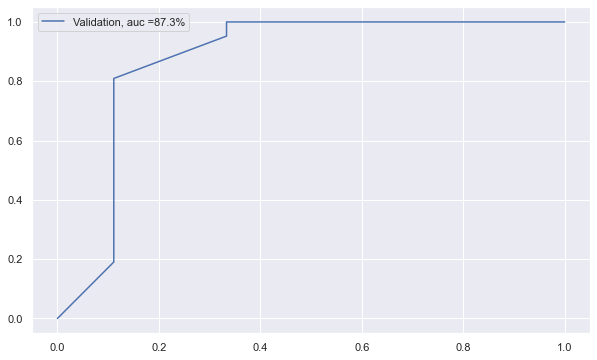

In [78]:
from sklearn import metrics

pred_probs = classifier.predict_proba(X_val)[:, 1]
print(f'ROC AUC Score: {roc_auc_score(y_val, pred_probs)*100} %')
print()
print(confusion_matrix(y_val, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_val, pred_probs)

plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, label = "Validation, auc =" + str(np.round(roc_auc_score(y_val, pred_probs),3)*100) + "%")
plt.legend()

### Feature Importance

In [79]:
#X_train_unscaled

In [80]:
#model = RandomForestClassifier()
#model.fit(X_train_unscaled, y_train)

In [81]:
#idx = ['Property_Area_rural','Property_Area_semiurban','Property_Area_urban','Gender', 'Married', 'Dependents', 
      # 'Education','Self_Employed', 'Credit_History','Total_Income_log', 'EMI_log', 'Balance_income_log']

In [82]:
#imp_features = pd.Series(model.feature_importances_, index = idx)
#imp_features.plot(kind = 'barh', figsize = (10,5))

### Preprocessing TEST set

In [83]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income_log,EMI_log,Balance_income_log
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,8.651724,5.722132,8.596826
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,8.428581,5.857933,8.349011
2,LP001031,Male,Yes,1,Graduate,No,1.0,Urban,8.824678,6.359189,8.735882
3,LP001035,Male,Yes,1,Graduate,No,1.0,Urban,8.494129,5.626821,8.435597
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,8.094378,5.378360,8.025952
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,1,Not Graduate,Yes,1.0,Urban,8.663196,5.749039,8.607420
363,LP002975,Male,Yes,0,Graduate,No,1.0,Urban,8.490233,5.766583,8.422345
364,LP002980,Male,No,0,Graduate,No,1.0,Semiurban,8.564649,5.857933,8.495561
365,LP002986,Male,Yes,0,Graduate,No,1.0,Rural,8.908289,6.084246,8.847088


In [84]:
X_test = test.iloc[:, 1:].values

In [85]:
X_test

array([['Male', 'Yes', 0, 'Graduate', 'No', 1.0, 'Urban',
        8.651724084373843, 5.722131613324398, 8.596825558501333],
       ['Male', 'Yes', 1, 'Graduate', 'No', 1.0, 'Urban',
        8.428580533059634, 5.857933154483459, 8.349011198176003],
       ['Male', 'Yes', 1, 'Graduate', 'No', 1.0, 'Urban',
        8.824677891164198, 6.3591893272333, 8.735882392381066],
       ['Male', 'Yes', 1, 'Graduate', 'No', 1.0, 'Urban',
        8.494129251817686, 5.626821433520073, 8.435597426521566],
       ['Male', 'No', 0, 'Not Graduate', 'No', 1.0, 'Urban',
        8.09437844497296, 5.378360074221573, 8.02595230628667],
       ['Male', 'Yes', 0, 'Not Graduate', 'Yes', 1.0, 'Urban',
        8.628197749459149, 6.0455317683782575, 8.549617355996551],
       ['Female', 'No', 1, 'Not Graduate', 'No', 1.0, 'Semiurban',
        7.70796153183549, 5.099188691437701, 7.631485548242085],
       ['Male', 'Yes', 1, 'Not Graduate', 'No', 0.0, 'Rural',
        8.263848131368906, 6.012083834310718, 8.152678069

In [86]:
X_test[:,[0,1,3,4]]

array([['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'No', 'Not Graduate', 'No'],
       ['Male', 'Yes', 'Not Graduate', 'Yes'],
       ['Female', 'No', 'Not Graduate', 'No'],
       ['Male', 'Yes', 'Not Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'No', 'Not Graduate', 'No'],
       ['Male', 'No', 'Not Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'No', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Female', 'No', 'Graduate', 'No'],
       ['Male', 'No', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'Yes', 'Graduate', 'No'],
       ['Male', 'No', 'Graduate', 'No'],
       ['Male', 'Yes', 'Not Graduate', 'No'],
       ['Female', 'No', 'Not Graduate', 'No'],
       ['Male', 'No', 'Graduate', 'No'],
     

In [87]:
#Encoding Binary variables
le = LabelEncoder()

for i in [0,1,3,4]: 
    X_test[:,i] = le.fit_transform(X_test[:,i])
    
print(X_test[:,[0,1,3,4]])

[[1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 1 1 1]
 [0 0 1 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 1]
 [1 0 0 1]
 [1 0 0 0]
 [1 1 0 0]
 [0 0 0 0]
 [1 1 1 0]
 [1 0 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 1 1 1]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [1 0 0 0]
 [0 0 1 0]
 [1 1 0 0]
 [0 1 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 0 0 1]
 [1 1 0 0]
 [0 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 1 0 1]

In [88]:
X_test[:,6]

array(['Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Rural', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Urban',
       'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban',
       'Semiurban', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural',
       'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Urban',
       'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Urban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban', 'Semiurban',
       'Urban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Urban',
       'Rural', 'Semiurban', 'Semiurban', 'Semiurban', 'Semiurban',
       'Urban', 'Semiurban', 'Rural', 'Urban', 'Semiurban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Rural', 'Semiurban', 'Semiurban',
       'Urban', 'Rural', 'Semiurban', 'Urban', 'Urban', 'Rural',
       'Semiurban', 'Urban', 'Urban', 'Urban', 'Rural', 'Rural',
       'Semiurban', 'Rural

In [89]:
#Onehotencoding property area
X_test = ct.transform(X_test)
print(X_test)

[[0.0 0.0 1.0 1 1 0 0 0 1.0 8.651724084373843 5.722131613324398
  8.596825558501333]
 [0.0 0.0 1.0 1 1 1 0 0 1.0 8.428580533059634 5.857933154483459
  8.349011198176003]
 [0.0 0.0 1.0 1 1 1 0 0 1.0 8.824677891164198 6.3591893272333
  8.735882392381066]
 [0.0 0.0 1.0 1 1 1 0 0 1.0 8.494129251817686 5.626821433520073
  8.435597426521566]
 [0.0 0.0 1.0 1 0 0 1 0 1.0 8.09437844497296 5.378360074221573
  8.02595230628667]
 [0.0 0.0 1.0 1 1 0 1 1 1.0 8.628197749459149 6.0455317683782575
  8.549617355996551]
 [0.0 1.0 0.0 0 0 1 1 0 1.0 7.70796153183549 5.099188691437701
  7.631485548242085]
 [1.0 0.0 0.0 1 1 1 1 0 0.0 8.263848131368906 6.012083834310718
  8.152678069637027]
 [0.0 0.0 1.0 1 1 1 0 0 1.0 9.520248603186129 7.061905958809396
  9.430786956409133]
 [0.0 1.0 0.0 1 0 0 1 0 1.0 8.476371196895983 5.833835602904399
  8.402530283096098]
 [0.0 0.0 1.0 1 0 0 1 0 1.0 8.036249942132116 5.521460917862246
  7.951911381854188]
 [0.0 1.0 0.0 1 1 1 0 0 1.0 8.216358332386156 6.1092475827643655
  8.

In [90]:
X_test_unscaled = X_test

In [91]:
X_test

array([[0.0, 0.0, 1.0, 1, 1, 0, 0, 0, 1.0, 8.651724084373843,
        5.722131613324398, 8.596825558501333],
       [0.0, 0.0, 1.0, 1, 1, 1, 0, 0, 1.0, 8.428580533059634,
        5.857933154483459, 8.349011198176003],
       [0.0, 0.0, 1.0, 1, 1, 1, 0, 0, 1.0, 8.824677891164198,
        6.3591893272333, 8.735882392381066],
       [0.0, 0.0, 1.0, 1, 1, 1, 0, 0, 1.0, 8.494129251817686,
        5.626821433520073, 8.435597426521566],
       [0.0, 0.0, 1.0, 1, 0, 0, 1, 0, 1.0, 8.09437844497296,
        5.378360074221573, 8.02595230628667],
       [0.0, 0.0, 1.0, 1, 1, 0, 1, 1, 1.0, 8.628197749459149,
        6.0455317683782575, 8.549617355996551],
       [0.0, 1.0, 0.0, 0, 0, 1, 1, 0, 1.0, 7.70796153183549,
        5.099188691437701, 7.631485548242085],
       [1.0, 0.0, 0.0, 1, 1, 1, 1, 0, 0.0, 8.263848131368906,
        6.012083834310718, 8.152678069637027],
       [0.0, 0.0, 1.0, 1, 1, 1, 0, 0, 1.0, 9.520248603186129,
        7.061905958809396, 9.430786956409133],
       [0.0, 1.0, 0.0, 

In [98]:
test_pred = classifier.predict(X_test)

In [93]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [106]:
submission['Loan_Status'] = test_pred
submission['Loan_ID'] = test['Loan_ID']

In [109]:
submission['Loan_Status'] = np.where(submission['Loan_Status'] == 0, 'N', 'Y')

In [115]:
submission.to_csv('Logistic.csv')